In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
# loading the dataset
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.keys())

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [ ]:
# having a look at its characteristics
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

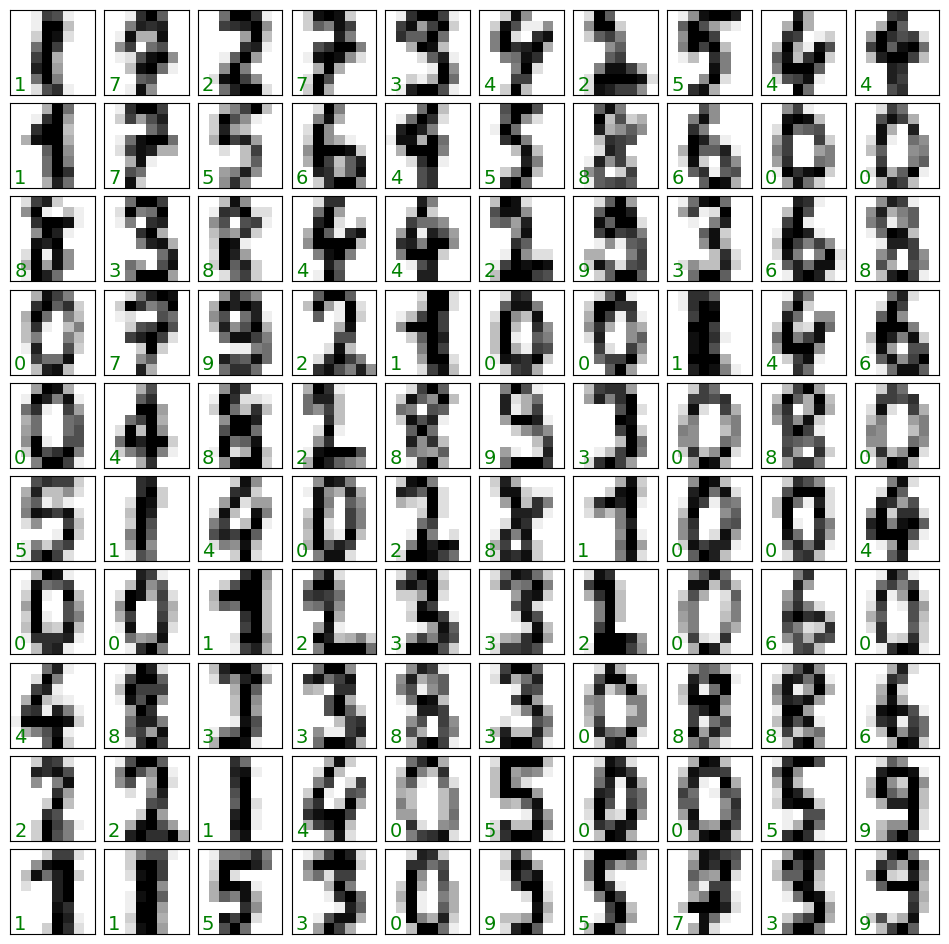

In [3]:
fig, axes = plt.subplots(10,10, figsize=(12, 12))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(42)
mychoices = np.random.choice(digits.images.shape[0],1000)
# plotting 100 images
for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

In [4]:
from sklearn.manifold import Isomap
# classifying the images using an unsupervised algorythm
X = digits.data
y = digits.target
print(X.shape)

isomap = Isomap(n_components=2,n_neighbors=5)
X_reduced = isomap.fit_transform(X[:100])

print(X_reduced.shape)

(1797, 64)
(100, 2)


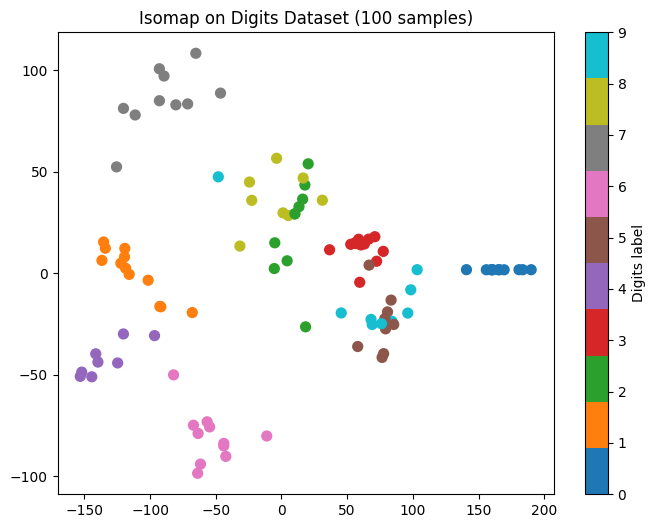

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y[:100], cmap='tab10', s=50)
plt.colorbar(label='Digits label', ticks=range(10))
plt.title('Isomap on Digits Dataset (100 samples)')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# classifying the images using a supervised algorythm
# first you have to divide the dataset in a train and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape)

model = LogisticRegression(solver='sag')
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print(f'Accuracy on the training set: {100*accuracy_score(y_pred_train,y_train):.2f}%\n',
      f'Accuracy on the validation set: {100*accuracy_score(y_pred_test,y_test):.2f}%')

(1437, 64) (360, 64)
Accuracy on the training set: 100.00%
 Accuracy on the validation set: 96.94%


/home/giacomo/myenv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix
# plotting the confusion matrices
print('Confusion matrix on the training set')
print(confusion_matrix(y_train, y_pred_train))
print('Confusion matrix on the validation set')
print(confusion_matrix(y_test, y_pred_test))

Confusion matrix on the training set
[[142   0   0   0   0   0   0   0   0   0]
 [  0 136   0   0   0   0   0   0   0   0]
 [  0   0 142   0   0   0   0   0   0   0]
 [  0   0   0 146   0   0   0   0   0   0]
 [  0   0   0   0 133   0   0   0   0   0]
 [  0   0   0   0   0 150   0   0   0   0]
 [  0   0   0   0   0   0 150   0   0   0]
 [  0   0   0   0   0   0   0 148   0   0]
 [  0   0   0   0   0   0   0   0 140   0]
 [  0   0   0   0   0   0   0   0   0 150]]
Confusion matrix on the validation set
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  1 35  0  0  0  0  1  0]
 [ 0  1  0  0 47  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0  3]
 [ 0  0  0  0  0  0 31  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  1]
 [ 0  0  1  0  0  2  0  0 31  0]
 [ 0  0  0  0  0  0  0  1  0 29]]


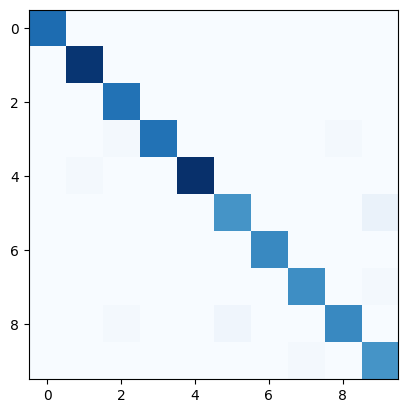

In [8]:
plt.imshow(confusion_matrix(y_test, y_pred_test),cmap='Blues')